In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
from scipy import stats
import mistree as mist

In [2]:
df = pd.read_csv("../data/wholetime.csv")
df.head()

/var/folders/pm/4cgtm7w90fbgczj718s4vvk40000gn/T/ipykernel_94478/3131874658.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/wholetime.csv")


,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng
0,41.9322,-87.6586,152.0,Lincoln Ave & Diversey Pkwy,2020-04-26 18:12:03,member,A847FADBBC638E45,docked_bike,41.8964,-87.6610,86,Eckhart Park,2020-04-26 17:45:14,3.981346,"(41.8964, -87.661)","(41.9322, -87.6586)"
1,41.9306,-87.7238,499.0,Kosciuszko Park,2020-04-17 17:17:03,member,5405B80E996FF60D,docked_bike,41.9244,-87.7154,503,Drake Ave & Fullerton Ave,2020-04-17 17:08:54,0.979629,"(41.9244, -87.7154)","(41.9306, -87.7238)"
2,41.8679,-87.6230,255.0,Indiana Ave & Roosevelt Rd,2020-04-01 18:08:36,member,5DD24A79A4E006F4,docked_bike,41.8945,-87.6179,142,McClurg Ct & Erie St,2020-04-01 17:54:13,2.984661,"(41.8945, -87.6179)","(41.8679, -87.623)"
3,41.8992,-87.6722,657.0,Wood St & Augusta Blvd,2020-04-07 13:02:31,member,2A59BBDF5CDBA725,docked_bike,41.9030,-87.6975,216,California Ave & Division St,2020-04-07 12:50:19,2.141375,"(41.903, -87.6975)","(41.8992, -87.6722)"
4,41.9695,-87.6547,323.0,Sheridan Rd & Lawrence Ave,2020-04-18 11:15:54,casual,27AD306C119C6158,docked_bike,41.8902,-87.6262,125,Rush St & Hubbard St,2020-04-18 10:22:59,9.119685,"(41.8902, -87.6262)","(41.9695, -87.6547)"


In [4]:
df = df.dropna()

In [3]:
# 1000件サンプル
df_sample = df.sample(n=1000, random_state=0)
df_sample.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng
14273857,41.915983,-87.677335,13133,Damen Ave & Cortland St,2021-04-10 23:12:26,casual,3E30A6BAF2E6979F,classic_bike,41.903119,-87.673935,TA1305000034,Honore St & Division St,2021-04-10 23:03:29,1.456404,"(41.903119, -87.673935)","(41.915983, -87.677335)"
18539958,41.866624,-87.694521,KA1504000102,Fairfield Ave & Roosevelt Rd,2021-05-20 17:22:13,member,4D38EEB9E2CF9C85,classic_bike,41.869482,-87.655486,13160,May St & Taylor St,2021-05-20 17:04:07,3.256230,"(41.8694821, -87.6554864)","(41.866624, -87.694521)"
9078342,41.888243,-87.636390,TA1305000022,Orleans St & Merchandise Mart Plaza,2023-01-12 10:00:33,casual,D9F22B885DBEB796,electric_bike,41.886109,-87.624753,TA1305000011,Michigan Ave & Lake St,2023-01-12 09:52:10,0.994488,"(41.886108518, -87.624753237)","(41.888243, -87.63639)"
11132957,41.949473,-87.646453,TA1307000150,Pine Grove Ave & Waveland Ave,2023-06-29 07:53:52,member,EF7BC7948BC17B32,classic_bike,41.940106,-87.645451,13277,Broadway & Belmont Ave,2023-06-29 07:46:45,1.043696,"(41.940106, -87.645451)","(41.94947274088333, -87.64645278453827)"
12372734,41.950687,-87.668700,13319,Ashland Ave & Grace St,2023-08-18 23:40:45,member,AE790AD0E53EA639,electric_bike,41.949235,-87.654438,TA1307000126,Sheffield Ave & Waveland Ave,2023-08-18 23:35:17,1.193495,"(41.94923466666667, -87.654438)","(41.950687, -87.6687)"


Text(0.5, 1.0, 'Histogram of Distance')

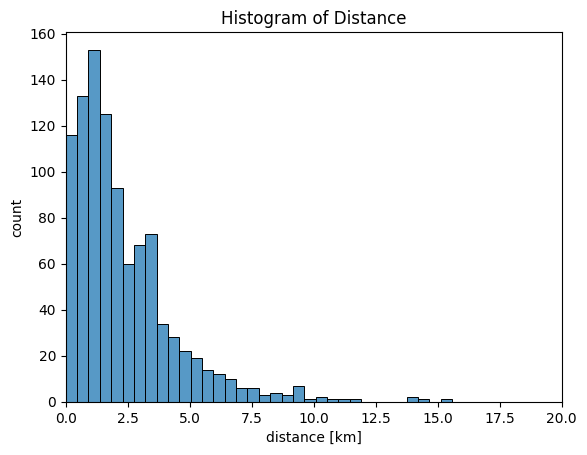

In [4]:
# distanceでヒストグラム
fig, ax = plt.subplots(1, 1, dpi=100)
ax = sns.histplot(
    data = df_sample,
    x = "distance"
)
ax.set_xlabel("distance [km]")
ax.set_ylabel("count")
ax.set_xlim(0, 20)
ax.set_title("Histogram of Distance")

In [9]:
# df_sampleを距離でソート
df_sample = df_sample.sort_values(by="distance")
df_sample.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng
11416542,41.899930,-87.634430,TA1306000011,Wells St & Walton St,2023-07-01 14:10:43,casual,A62B080D5C8E6929,classic_bike,41.899930,-87.634430,TA1306000011,Wells St & Walton St,2023-07-01 14:08:54,0.0,"(41.89993001, -87.63443007)","(41.89993001, -87.63443007)"
90746,41.935900,-87.678400,162.0,Damen Ave & Wellington Ave,2020-05-02 12:54:49,casual,CB9D67FD455828E1,docked_bike,41.935900,-87.678400,162,Damen Ave & Wellington Ave,2020-05-02 12:37:35,0.0,"(41.9359, -87.6784)","(41.9359, -87.6784)"
62369,41.867900,-87.623000,255.0,Indiana Ave & Roosevelt Rd,2020-04-11 14:27:20,member,944B3CBB470B518A,docked_bike,41.867900,-87.623000,255,Indiana Ave & Roosevelt Rd,2020-04-11 14:03:12,0.0,"(41.8679, -87.623)","(41.8679, -87.623)"
15354517,41.881892,-87.648789,TA1307000120,Green St & Madison St,2021-07-18 14:10:23,casual,276C747EFF53C76A,classic_bike,41.881892,-87.648789,TA1307000120,Green St & Madison St,2021-07-18 13:59:13,0.0,"(41.881892, -87.648789)","(41.881892, -87.648789)"
6829253,41.980000,-87.690000,NaN,NaN,2022-08-16 16:47:51,member,CBBC33CF1B8797AE,electric_bike,41.980000,-87.690000,NaN,NaN,2022-08-16 16:46:25,0.0,"(41.98, -87.69)","(41.98, -87.69)"


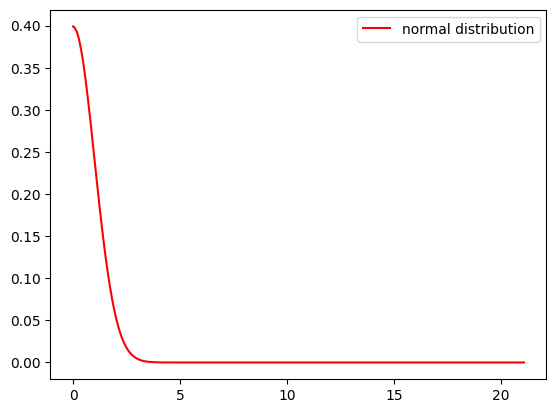

In [11]:
y2 = stats.norm.pdf(df_sample["distance"])

plt.plot(df_sample["distance"], y2, color="red", label="normal distribution")
plt.legend()
plt.show()

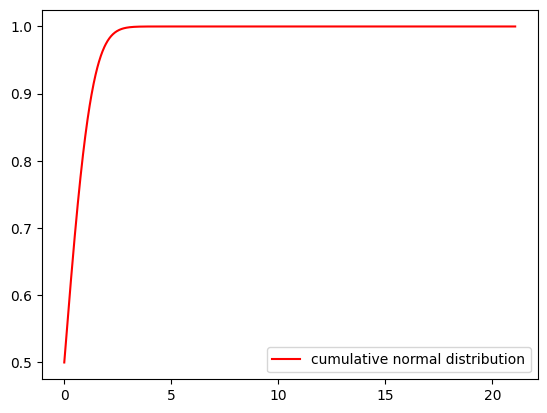

In [14]:
y2 = stats.norm.cdf(df_sample["distance"])

plt.plot(df_sample["distance"], y2, color="red", label="cumulative normal distribution")
plt.legend()
plt.show()

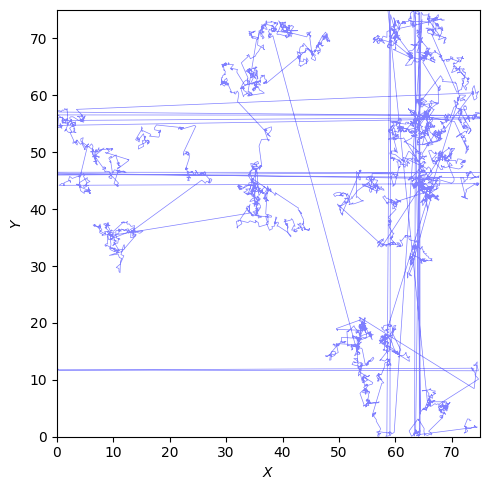

In [30]:
size = 5000
x, y = mist.get_levy_flight(size, mode="2D")

plt.figure(figsize=(5, 5))
plt.plot(x, y, color="blue", label="levy flight", alpha=0.5, linewidth=0.5)    
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.xlim(0., 75.)
plt.ylim(0., 75.)
plt.tight_layout()
plt.show()